In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [3]:
df = pd.read_csv('letter-recognition.data',header=None)

train_df = df[:1600]
test_df = df[16000:16000+400]

X = train_df.ix[:,1:16].to_numpy() 
y = np.array([ord(l)-ord('A') for l in train_df.ix[:,0].to_numpy()])

In [4]:
def get_winner(class1, class2):
    
    numbers = [*range(26)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 9)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-letter2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
winner_list = []

for class1 in range(0,25):
    for class2 in range(class1+1,26):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:64
number of class2:70

 ****** Running generation 0 ****** 

Population's average fitness: 0.51127 stdev: 0.10690
Best fitness: 0.95522 - size: (2, 3) - species 2 - id 78
Average adjusted fitness: 0.422
Mean genetic distance 2.686, standard deviation 0.474
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.642 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54284 stdev: 0.13247
Best fitness: 0.95522 - size: (3, 4) - species 7 - id 240
Average adjusted fitness: 0.438
Mean genetic distance 2.762, standard deviation 0.501
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 0.488 sec (0.565 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57029 stdev: 0.15066
Best fitness: 0.97761 - size: (3, 5) - species 15 - id 491
Average adjusted fitness: 0.447
Mean genetic distance 2.779, standard deviation 0.511
Population of 201 members in 18 species
Total extinctions: 0

Mean genetic distance 3.019, standard deviation 0.530
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.815 sec (0.663 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60015 stdev: 0.14226
Best fitness: 0.97059 - size: (5, 8) - species 18 - id 1244
Average adjusted fitness: 0.288
Mean genetic distance 3.040, standard deviation 0.539
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 1.055 sec (0.712 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61149 stdev: 0.15910
Best fitness: 0.97059 - size: (5, 8) - species 18 - id 1244
Average adjusted fitness: 0.471
Mean genetic distance 3.035, standard deviation 0.566
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 0.790 sec (0.720 average)
number of class1:64
number of class2:55

 ****** Running generation 0 ****** 

Population's average fitness: 0.50185 stdev: 0.11136
Best fitness: 0.97479 - si

Population's average fitness: 0.61067 stdev: 0.16028
Best fitness: 0.96000 - size: (3, 5) - species 29 - id 690
Average adjusted fitness: 0.533
Mean genetic distance 3.021, standard deviation 0.522
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 1.239 sec (0.812 average)
number of class1:64
number of class2:70

 ****** Running generation 0 ****** 

Population's average fitness: 0.51638 stdev: 0.08923
Best fitness: 0.89552 - size: (2, 3) - species 3 - id 20
Average adjusted fitness: 0.306
Mean genetic distance 2.669, standard deviation 0.477
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 0.679 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54155 stdev: 0.11240
Best fitness: 0.94776 - size: (2, 4) - species 4 - id 306
Average adjusted fitness: 0.368
Mean genetic distance 2.658, standard deviation 0.533
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 1.036 sec (0.857 aver

Generation time: 0.737 sec (0.676 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57476 stdev: 0.13483
Best fitness: 0.94558 - size: (2, 3) - species 5 - id 180
Average adjusted fitness: 0.323
Mean genetic distance 3.005, standard deviation 0.546
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 0.924 sec (0.711 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59371 stdev: 0.13440
Best fitness: 0.94558 - size: (2, 3) - species 5 - id 180
Average adjusted fitness: 0.325
Mean genetic distance 2.990, standard deviation 0.550
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 0.838 sec (0.727 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59756 stdev: 0.13829
Best fitness: 0.94558 - size: (2, 3) - species 5 - id 180
Average adjusted fitness: 0.345
Mean genetic distance 3.005, standard deviation 0.557
Population of 196 members in 25 species
T

Population of 204 members in 23 species
Total extinctions: 0
Generation time: 0.572 sec (0.519 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57864 stdev: 0.14029
Best fitness: 0.93525 - size: (2, 4) - species 5 - id 353
Average adjusted fitness: 0.276
Mean genetic distance 2.919, standard deviation 0.521
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 0.696 sec (0.563 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59308 stdev: 0.15324
Best fitness: 0.96403 - size: (5, 8) - species 18 - id 835
Average adjusted fitness: 0.404
Mean genetic distance 2.924, standard deviation 0.537
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.936 sec (0.638 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61442 stdev: 0.16242
Best fitness: 0.96403 - size: (5, 8) - species 18 - id 835
Average adjusted fitness: 0.273
Mean genetic distance 2.954, sta

Population's average fitness: 0.63243 stdev: 0.17531
Best fitness: 0.98507 - size: (3, 5) - species 16 - id 1153
Average adjusted fitness: 0.350
Mean genetic distance 2.872, standard deviation 0.547
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.865 sec (0.830 average)
number of class1:64
number of class2:55

 ****** Running generation 0 ****** 

Population's average fitness: 0.51345 stdev: 0.08679
Best fitness: 0.91597 - size: (2, 3) - species 2 - id 15
Average adjusted fitness: 0.349
Mean genetic distance 2.643, standard deviation 0.479
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.608 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53525 stdev: 0.09962
Best fitness: 0.91597 - size: (2, 3) - species 2 - id 15
Average adjusted fitness: 0.296
Mean genetic distance 2.753, standard deviation 0.528
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 1.038 sec (0.823 aver

Population's average fitness: 0.59633 stdev: 0.15058
Best fitness: 0.96296 - size: (2, 4) - species 6 - id 509
Average adjusted fitness: 0.429
Mean genetic distance 2.927, standard deviation 0.568
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 1.071 sec (0.865 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61423 stdev: 0.15712
Best fitness: 0.96296 - size: (2, 4) - species 6 - id 509
Average adjusted fitness: 0.374
Mean genetic distance 2.919, standard deviation 0.570
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 1.055 sec (0.892 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61793 stdev: 0.16522
Best fitness: 0.96296 - size: (4, 6) - species 15 - id 1211
Average adjusted fitness: 0.566
Mean genetic distance 2.945, standard deviation 0.569
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 0.900 sec (0.893 average)

 ****** Running 

Generation time: 0.736 sec (0.640 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57233 stdev: 0.13716
Best fitness: 0.96694 - size: (3, 5) - species 6 - id 335
Average adjusted fitness: 0.484
Mean genetic distance 2.877, standard deviation 0.572
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.660 sec (0.647 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57934 stdev: 0.15823
Best fitness: 0.96694 - size: (3, 4) - species 5 - id 696
Average adjusted fitness: 0.480
Mean genetic distance 2.950, standard deviation 0.564
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 0.759 sec (0.675 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59120 stdev: 0.15793
Best fitness: 0.96694 - size: (5, 8) - species 10 - id 845
Average adjusted fitness: 0.279
Mean genetic distance 2.969, standard deviation 0.534
Population of 198 members in 22 species


Generation time: 1.146 sec (0.811 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62164 stdev: 0.17767
Best fitness: 0.98450 - size: (5, 9) - species 13 - id 1508
Average adjusted fitness: 0.457
Mean genetic distance 3.075, standard deviation 0.583
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.946 sec (0.826 average)
number of class1:64
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.50630 stdev: 0.11534
Best fitness: 0.96850 - size: (2, 3) - species 1 - id 5
Average adjusted fitness: 0.462
Mean genetic distance 2.725, standard deviation 0.546
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 0.636 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53191 stdev: 0.13582
Best fitness: 0.96850 - size: (2, 4) - species 5 - id 311
Average adjusted fitness: 0.490
Mean genetic distance 2.807, standard deviation 0.570
Population of 200


Population's average fitness: 0.52426 stdev: 0.06206
Best fitness: 0.81690 - size: (3, 5) - species 20 - id 622
Average adjusted fitness: 0.159
Mean genetic distance 2.862, standard deviation 0.537
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 0.632 sec (0.668 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.52764 stdev: 0.06820
Best fitness: 0.81690 - size: (3, 5) - species 9 - id 622
Average adjusted fitness: 0.141
Mean genetic distance 2.860, standard deviation 0.547
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.719 sec (0.678 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53701 stdev: 0.07359
Best fitness: 0.81690 - size: (3, 5) - species 9 - id 622
Average adjusted fitness: 0.174
Mean genetic distance 2.778, standard deviation 0.527
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.685 sec (0.679 average)

 ****** Running 

Population's average fitness: 0.49294 stdev: 0.04850
Best fitness: 0.67176 - size: (2, 3) - species 2 - id 194
Average adjusted fitness: 0.270
Mean genetic distance 2.635, standard deviation 0.473
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 0.398 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51665 stdev: 0.05652
Best fitness: 0.94656 - size: (2, 4) - species 4 - id 371
Average adjusted fitness: 0.136
Mean genetic distance 2.651, standard deviation 0.464
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 0.466 sec (0.432 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52121 stdev: 0.06512
Best fitness: 0.94656 - size: (2, 4) - species 4 - id 371
Average adjusted fitness: 0.195
Mean genetic distance 2.645, standard deviation 0.478
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 0.477 sec (0.447 average)

 ****** Running generation 3 *****

Mean genetic distance 3.020, standard deviation 0.520
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 0.735 sec (0.602 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61305 stdev: 0.17136
Best fitness: 0.93077 - size: (5, 8) - species 27 - id 840
Average adjusted fitness: 0.414
Mean genetic distance 3.072, standard deviation 0.522
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 0.771 sec (0.623 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62709 stdev: 0.17466
Best fitness: 0.93077 - size: (5, 8) - species 27 - id 840
Average adjusted fitness: 0.484
Mean genetic distance 3.084, standard deviation 0.520
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 0.711 sec (0.633 average)
number of class1:70
number of class2:83

 ****** Running generation 0 ****** 

Population's average fitness: 0.49180 stdev: 0.08980
Best fitness: 0.78431 - size

Mean genetic distance 2.937, standard deviation 0.611
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 0.516 sec (0.512 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57099 stdev: 0.14746
Best fitness: 0.91057 - size: (3, 6) - species 4 - id 629
Average adjusted fitness: 0.453
Mean genetic distance 2.922, standard deviation 0.599
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.655 sec (0.541 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57080 stdev: 0.14702
Best fitness: 0.91057 - size: (4, 6) - species 3 - id 459
Average adjusted fitness: 0.403
Mean genetic distance 3.016, standard deviation 0.597
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 0.573 sec (0.546 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58919 stdev: 0.15172
Best fitness: 0.91057 - size: (4, 6) - species 8 - id 459
Average adju

Mean genetic distance 2.702, standard deviation 0.508
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.536 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52286 stdev: 0.06630
Best fitness: 0.76984 - size: (2, 3) - species 11 - id 285
Average adjusted fitness: 0.300
Mean genetic distance 2.839, standard deviation 0.540
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 0.460 sec (0.498 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53877 stdev: 0.07557
Best fitness: 0.84127 - size: (4, 6) - species 12 - id 384
Average adjusted fitness: 0.415
Mean genetic distance 2.830, standard deviation 0.533
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.496 sec (0.497 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53641 stdev: 0.07855
Best fitness: 0.84127 - size: (4, 6) - species 12 - id 384
Average adjusted fitness:

Mean genetic distance 2.963, standard deviation 0.560
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 0.597 sec (0.537 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.54753 stdev: 0.09982
Best fitness: 0.92000 - size: (2, 5) - species 6 - id 898
Average adjusted fitness: 0.259
Mean genetic distance 3.025, standard deviation 0.571
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.606 sec (0.546 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55113 stdev: 0.11366
Best fitness: 0.92000 - size: (2, 5) - species 6 - id 898
Average adjusted fitness: 0.231
Mean genetic distance 3.052, standard deviation 0.563
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.633 sec (0.555 average)
number of class1:70
number of class2:54

 ****** Running generation 0 ****** 

Population's average fitness: 0.49516 stdev: 0.06839
Best fitness: 0.61290 - size: 

Average adjusted fitness: 0.353
Mean genetic distance 2.912, standard deviation 0.633
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.531 sec (0.540 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56637 stdev: 0.14090
Best fitness: 0.95420 - size: (4, 7) - species 6 - id 863
Average adjusted fitness: 0.418
Mean genetic distance 2.954, standard deviation 0.616
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 0.641 sec (0.560 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57464 stdev: 0.13759
Best fitness: 0.95420 - size: (4, 7) - species 6 - id 863
Average adjusted fitness: 0.371
Mean genetic distance 3.043, standard deviation 0.587
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.554 sec (0.559 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58065 stdev: 0.13841
Best fitness: 0.95420 - size: (4, 7) -

Population's average fitness: 0.55664 stdev: 0.16335
Best fitness: 0.98214 - size: (3, 5) - species 8 - id 317
Average adjusted fitness: 0.364
Mean genetic distance 2.735, standard deviation 0.550
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 0.689 sec (0.847 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56524 stdev: 0.16769
Best fitness: 0.98214 - size: (3, 4) - species 2 - id 467
Average adjusted fitness: 0.333
Mean genetic distance 2.734, standard deviation 0.537
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 0.889 sec (0.861 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57722 stdev: 0.19863
Best fitness: 0.98214 - size: (4, 6) - species 4 - id 630
Average adjusted fitness: 0.469
Mean genetic distance 2.847, standard deviation 0.538
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 1.026 sec (0.902 average)

 ****** Running ge

Mean genetic distance 3.120, standard deviation 0.548
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 1.166 sec (1.038 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61115 stdev: 0.15878
Best fitness: 0.98496 - size: (4, 7) - species 37 - id 1003
Average adjusted fitness: 0.461
Mean genetic distance 3.096, standard deviation 0.550
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 1.108 sec (1.045 average)
number of class1:70
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.49847 stdev: 0.09571
Best fitness: 0.85950 - size: (2, 3) - species 1 - id 90
Average adjusted fitness: 0.301
Mean genetic distance 2.713, standard deviation 0.482
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 1.225 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54252 stdev: 0.10345
Best fitness: 0.90083 - size: (3, 4) - specie


 ****** Running generation 5 ****** 

Population's average fitness: 0.52998 stdev: 0.07187
Best fitness: 0.88288 - size: (4, 9) - species 16 - id 887
Average adjusted fitness: 0.161
Mean genetic distance 3.011, standard deviation 0.566
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 0.748 sec (0.641 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53144 stdev: 0.08290
Best fitness: 0.93694 - size: (5, 9) - species 7 - id 1157
Average adjusted fitness: 0.265
Mean genetic distance 3.002, standard deviation 0.545
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.751 sec (0.657 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.54149 stdev: 0.08665
Best fitness: 0.93694 - size: (5, 9) - species 22 - id 1157
Average adjusted fitness: 0.145
Mean genetic distance 3.063, standard deviation 0.538
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.

Population's average fitness: 0.55972 stdev: 0.11555
Best fitness: 0.91270 - size: (3, 5) - species 13 - id 327
Average adjusted fitness: 0.189
Mean genetic distance 2.868, standard deviation 0.528
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.530 sec (0.545 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57370 stdev: 0.12962
Best fitness: 0.92063 - size: (5, 9) - species 2 - id 637
Average adjusted fitness: 0.179
Mean genetic distance 3.032, standard deviation 0.535
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.522 sec (0.539 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59417 stdev: 0.14992
Best fitness: 0.92063 - size: (5, 9) - species 2 - id 637
Average adjusted fitness: 0.309
Mean genetic distance 3.080, standard deviation 0.535
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.567 sec (0.545 average)

 ****** Running g

Population's average fitness: 0.59079 stdev: 0.13370
Best fitness: 0.92086 - size: (3, 6) - species 6 - id 1049
Average adjusted fitness: 0.190
Mean genetic distance 2.876, standard deviation 0.585
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 0.623 sec (0.555 average)
number of class1:56
number of class2:66

 ****** Running generation 0 ****** 

Population's average fitness: 0.50529 stdev: 0.07714
Best fitness: 0.77049 - size: (2, 3) - species 3 - id 147
Average adjusted fitness: 0.309
Mean genetic distance 2.542, standard deviation 0.430
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 0.373 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53250 stdev: 0.07650
Best fitness: 0.79508 - size: (3, 4) - species 4 - id 332
Average adjusted fitness: 0.323
Mean genetic distance 2.645, standard deviation 0.455
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 0.497 sec (0.435 ave

Population's average fitness: 0.59969 stdev: 0.15002
Best fitness: 0.96947 - size: (3, 5) - species 13 - id 903
Average adjusted fitness: 0.386
Mean genetic distance 3.057, standard deviation 0.532
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.610 sec (0.552 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60385 stdev: 0.15980
Best fitness: 0.96947 - size: (3, 5) - species 13 - id 903
Average adjusted fitness: 0.518
Mean genetic distance 3.147, standard deviation 0.510
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 0.782 sec (0.585 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62709 stdev: 0.15387
Best fitness: 0.96947 - size: (3, 5) - species 13 - id 903
Average adjusted fitness: 0.296
Mean genetic distance 3.134, standard deviation 0.505
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 0.727 sec (0.603 average)

 ****** Running


Population's average fitness: 0.53562 stdev: 0.10316
Best fitness: 0.91270 - size: (3, 6) - species 6 - id 515
Average adjusted fitness: 0.317
Mean genetic distance 2.830, standard deviation 0.574
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 0.595 sec (0.488 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55816 stdev: 0.11428
Best fitness: 0.92857 - size: (2, 5) - species 6 - id 712
Average adjusted fitness: 0.524
Mean genetic distance 2.869, standard deviation 0.560
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 0.666 sec (0.533 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55873 stdev: 0.11913
Best fitness: 0.96032 - size: (3, 7) - species 6 - id 876
Average adjusted fitness: 0.441
Mean genetic distance 2.865, standard deviation 0.538
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 0.577 sec (0.542 average)

 ****** Running g


Population's average fitness: 0.51197 stdev: 0.08087
Best fitness: 0.84252 - size: (2, 3) - species 8 - id 172
Average adjusted fitness: 0.343
Mean genetic distance 2.678, standard deviation 0.500
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 0.401 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52555 stdev: 0.09426
Best fitness: 0.85827 - size: (3, 5) - species 8 - id 314
Average adjusted fitness: 0.288
Mean genetic distance 2.763, standard deviation 0.572
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.468 sec (0.434 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55514 stdev: 0.10612
Best fitness: 0.85827 - size: (3, 5) - species 1 - id 314
Average adjusted fitness: 0.241
Mean genetic distance 2.831, standard deviation 0.606
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 0.687 sec (0.519 average)

 ****** Running generation 3 ****

Population's average fitness: 0.57691 stdev: 0.10828
Best fitness: 0.90179 - size: (3, 5) - species 1 - id 643
Average adjusted fitness: 0.224
Mean genetic distance 3.041, standard deviation 0.553
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.569 sec (0.543 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58013 stdev: 0.11624
Best fitness: 0.90179 - size: (3, 4) - species 2 - id 1427
Average adjusted fitness: 0.177
Mean genetic distance 3.058, standard deviation 0.549
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 0.639 sec (0.554 average)
number of class1:56
number of class2:57

 ****** Running generation 0 ****** 

Population's average fitness: 0.49739 stdev: 0.07231
Best fitness: 0.73451 - size: (2, 3) - species 8 - id 199
Average adjusted fitness: 0.402
Mean genetic distance 2.673, standard deviation 0.480
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.40

Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.864 sec (0.573 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57156 stdev: 0.11724
Best fitness: 0.88430 - size: (2, 3) - species 7 - id 40
Average adjusted fitness: 0.395
Mean genetic distance 2.909, standard deviation 0.599
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.719 sec (0.597 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57346 stdev: 0.11791
Best fitness: 0.90909 - size: (3, 5) - species 7 - id 1223
Average adjusted fitness: 0.359
Mean genetic distance 2.898, standard deviation 0.562
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 0.592 sec (0.596 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58258 stdev: 0.12568
Best fitness: 0.91736 - size: (6, 11) - species 12 - id 1311
Average adjusted fitness: 0.253
Mean genetic distance 2.886, st

Generation time: 0.676 sec (0.569 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55610 stdev: 0.12387
Best fitness: 0.92913 - size: (2, 4) - species 1 - id 554
Average adjusted fitness: 0.473
Mean genetic distance 2.874, standard deviation 0.560
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 0.625 sec (0.588 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55118 stdev: 0.11446
Best fitness: 0.95276 - size: (3, 5) - species 18 - id 625
Average adjusted fitness: 0.259
Mean genetic distance 2.910, standard deviation 0.595
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.558 sec (0.581 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56744 stdev: 0.12576
Best fitness: 0.95276 - size: (3, 5) - species 18 - id 625
Average adjusted fitness: 0.310
Mean genetic distance 2.918, standard deviation 0.599
Population of 198 members in 25 species

Mean genetic distance 3.164, standard deviation 0.497
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 1.017 sec (0.659 average)
number of class1:72
number of class2:70

 ****** Running generation 0 ****** 

Population's average fitness: 0.49599 stdev: 0.05111
Best fitness: 0.68310 - size: (2, 3) - species 3 - id 4
Average adjusted fitness: 0.235
Mean genetic distance 2.740, standard deviation 0.521
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.423 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51060 stdev: 0.05164
Best fitness: 0.83803 - size: (3, 4) - species 3 - id 367
Average adjusted fitness: 0.201
Mean genetic distance 2.804, standard deviation 0.550
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 0.492 sec (0.458 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52817 stdev: 0.06093
Best fitness: 0.83803 - size: (3, 4) - species 3

Population of 196 members in 35 species
Total extinctions: 0
Generation time: 0.738 sec (0.679 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57561 stdev: 0.13348
Best fitness: 0.89032 - size: (3, 6) - species 28 - id 686
Average adjusted fitness: 0.406
Mean genetic distance 3.034, standard deviation 0.494
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 0.753 sec (0.689 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58863 stdev: 0.12989
Best fitness: 0.89032 - size: (3, 6) - species 28 - id 686
Average adjusted fitness: 0.218
Mean genetic distance 3.032, standard deviation 0.512
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 0.735 sec (0.695 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59078 stdev: 0.12944
Best fitness: 0.89032 - size: (5, 10) - species 1 - id 1403
Average adjusted fitness: 0.399
Mean genetic distance 3.049, s

Population's average fitness: 0.57221 stdev: 0.13559
Best fitness: 0.98639 - size: (2, 4) - species 2 - id 548
Average adjusted fitness: 0.422
Mean genetic distance 3.061, standard deviation 0.599
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 1.008 sec (0.680 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57468 stdev: 0.13297
Best fitness: 0.98639 - size: (2, 4) - species 2 - id 548
Average adjusted fitness: 0.252
Mean genetic distance 3.045, standard deviation 0.574
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 1.215 sec (0.787 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58015 stdev: 0.14415
Best fitness: 0.98639 - size: (2, 4) - species 2 - id 548
Average adjusted fitness: 0.429
Mean genetic distance 3.140, standard deviation 0.567
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 1.114 sec (0.842 average)

 ****** Running ge

Population's average fitness: 0.50236 stdev: 0.06070
Best fitness: 0.77465 - size: (2, 3) - species 4 - id 173
Average adjusted fitness: 0.391
Mean genetic distance 2.689, standard deviation 0.477
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 0.711 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51734 stdev: 0.05947
Best fitness: 0.78873 - size: (2, 4) - species 5 - id 372
Average adjusted fitness: 0.184
Mean genetic distance 2.774, standard deviation 0.491
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 0.737 sec (0.724 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52824 stdev: 0.07529
Best fitness: 0.78873 - size: (2, 4) - species 7 - id 372
Average adjusted fitness: 0.366
Mean genetic distance 2.807, standard deviation 0.514
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.820 sec (0.756 average)

 ****** Running generation 3 *****

Population's average fitness: 0.55054 stdev: 0.09184
Best fitness: 0.80952 - size: (5, 10) - species 4 - id 1077
Average adjusted fitness: 0.207
Mean genetic distance 3.002, standard deviation 0.572
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 0.897 sec (0.772 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.54649 stdev: 0.10174
Best fitness: 0.80952 - size: (5, 10) - species 4 - id 1077
Average adjusted fitness: 0.281
Mean genetic distance 2.989, standard deviation 0.578
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 0.896 sec (0.788 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55003 stdev: 0.09887
Best fitness: 0.80952 - size: (5, 9) - species 10 - id 1425
Average adjusted fitness: 0.219
Mean genetic distance 2.983, standard deviation 0.587
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 0.899 sec (0.800 average)
number of cla


 ****** Running generation 4 ****** 

Population's average fitness: 0.55850 stdev: 0.11942
Best fitness: 0.91406 - size: (4, 7) - species 1 - id 439
Average adjusted fitness: 0.338
Mean genetic distance 2.953, standard deviation 0.564
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.824 sec (0.666 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57457 stdev: 0.12238
Best fitness: 0.94531 - size: (4, 6) - species 1 - id 1045
Average adjusted fitness: 0.209
Mean genetic distance 2.986, standard deviation 0.558
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 0.947 sec (0.713 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56948 stdev: 0.13043
Best fitness: 0.94531 - size: (4, 6) - species 1 - id 1045
Average adjusted fitness: 0.274
Mean genetic distance 3.023, standard deviation 0.570
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 0.76

Generation time: 0.478 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52223 stdev: 0.06573
Best fitness: 0.90511 - size: (3, 5) - species 8 - id 371
Average adjusted fitness: 0.198
Mean genetic distance 2.992, standard deviation 0.529
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 0.721 sec (0.600 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52580 stdev: 0.07777
Best fitness: 0.90511 - size: (3, 5) - species 8 - id 371
Average adjusted fitness: 0.279
Mean genetic distance 2.983, standard deviation 0.538
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 0.650 sec (0.616 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53011 stdev: 0.07739
Best fitness: 0.90511 - size: (3, 5) - species 8 - id 371
Average adjusted fitness: 0.172
Mean genetic distance 2.986, standard deviation 0.526
Population of 205 members in 30 species
Total extinctions

Mean genetic distance 2.999, standard deviation 0.556
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 0.843 sec (0.626 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57944 stdev: 0.14440
Best fitness: 0.95122 - size: (4, 7) - species 1 - id 1049
Average adjusted fitness: 0.400
Mean genetic distance 2.995, standard deviation 0.567
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 0.677 sec (0.632 average)
number of class1:55
number of class2:50

 ****** Running generation 0 ****** 

Population's average fitness: 0.49424 stdev: 0.07488
Best fitness: 0.77143 - size: (2, 3) - species 5 - id 64
Average adjusted fitness: 0.392
Mean genetic distance 2.605, standard deviation 0.498
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 0.507 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51701 stdev: 0.07577
Best fitness: 0.92381 - size: (2, 3) - species

Total extinctions: 0
Generation time: 0.730 sec (0.574 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57465 stdev: 0.12759
Best fitness: 0.92800 - size: (4, 7) - species 7 - id 991
Average adjusted fitness: 0.246
Mean genetic distance 2.900, standard deviation 0.534
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.619 sec (0.581 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58517 stdev: 0.13883
Best fitness: 0.92800 - size: (4, 7) - species 7 - id 991
Average adjusted fitness: 0.436
Mean genetic distance 3.009, standard deviation 0.564
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.661 sec (0.593 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60068 stdev: 0.13527
Best fitness: 0.92800 - size: (4, 7) - species 7 - id 991
Average adjusted fitness: 0.381
Mean genetic distance 3.100, standard deviation 0.559
Population of 203 me


 ****** Running generation 2 ****** 

Population's average fitness: 0.53993 stdev: 0.08511
Best fitness: 0.83471 - size: (3, 6) - species 4 - id 532
Average adjusted fitness: 0.264
Mean genetic distance 2.800, standard deviation 0.553
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 0.738 sec (0.669 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55622 stdev: 0.09212
Best fitness: 0.83471 - size: (3, 6) - species 4 - id 532
Average adjusted fitness: 0.338
Mean genetic distance 2.872, standard deviation 0.547
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.547 sec (0.639 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56074 stdev: 0.10585
Best fitness: 0.86777 - size: (4, 7) - species 9 - id 875
Average adjusted fitness: 0.262
Mean genetic distance 2.962, standard deviation 0.565
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.716 

Total extinctions: 0
Generation time: 0.840 sec (0.658 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58241 stdev: 0.15045
Best fitness: 0.97479 - size: (2, 4) - species 6 - id 298
Average adjusted fitness: 0.443
Mean genetic distance 2.735, standard deviation 0.511
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 1.230 sec (0.848 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59668 stdev: 0.16899
Best fitness: 0.99160 - size: (2, 4) - species 10 - id 667
Average adjusted fitness: 0.445
Mean genetic distance 2.819, standard deviation 0.551
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 1.077 sec (0.905 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61111 stdev: 0.17354
Best fitness: 1.00000 - size: (5, 9) - species 7 - id 819

Best individual in generation 4 meets fitness threshold - complexity: (5, 9)
number of class1:55
number 

Population's average fitness: 0.54233 stdev: 0.10203
Best fitness: 0.89091 - size: (4, 6) - species 19 - id 727
Average adjusted fitness: 0.317
Mean genetic distance 2.779, standard deviation 0.493
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 1.193 sec (0.938 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56423 stdev: 0.11156
Best fitness: 0.89091 - size: (4, 6) - species 19 - id 727
Average adjusted fitness: 0.441
Mean genetic distance 2.828, standard deviation 0.501
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.813 sec (0.913 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55891 stdev: 0.10361
Best fitness: 0.89091 - size: (4, 6) - species 17 - id 727
Average adjusted fitness: 0.417
Mean genetic distance 2.941, standard deviation 0.520
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.839 sec (0.901 average)

 ****** Running

Population's average fitness: 0.50185 stdev: 0.09642
Best fitness: 0.90517 - size: (2, 3) - species 1 - id 72
Average adjusted fitness: 0.332
Mean genetic distance 2.724, standard deviation 0.517
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.510 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52694 stdev: 0.09272
Best fitness: 0.90517 - size: (2, 3) - species 1 - id 72
Average adjusted fitness: 0.269
Mean genetic distance 2.770, standard deviation 0.535
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 0.545 sec (0.527 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54146 stdev: 0.11574
Best fitness: 0.90517 - size: (2, 3) - species 1 - id 72
Average adjusted fitness: 0.363
Mean genetic distance 2.760, standard deviation 0.539
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.586 sec (0.547 average)

 ****** Running generation 3 ****** 


Population's average fitness: 0.59321 stdev: 0.15076
Best fitness: 0.97321 - size: (3, 6) - species 28 - id 476
Average adjusted fitness: 0.354
Mean genetic distance 3.112, standard deviation 0.581
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 1.007 sec (0.735 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59077 stdev: 0.16183
Best fitness: 0.97321 - size: (3, 6) - species 28 - id 476
Average adjusted fitness: 0.466
Mean genetic distance 3.166, standard deviation 0.586
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 0.959 sec (0.763 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61526 stdev: 0.16330
Best fitness: 0.98214 - size: (6, 10) - species 6 - id 1449
Average adjusted fitness: 0.450
Mean genetic distance 3.152, standard deviation 0.579
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 0.981 sec (0.787 average)
number of class

Mean genetic distance 3.109, standard deviation 0.591
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 0.943 sec (0.834 average)
number of class1:55
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.50080 stdev: 0.05216
Best fitness: 0.71698 - size: (2, 3) - species 4 - id 82
Average adjusted fitness: 0.258
Mean genetic distance 2.655, standard deviation 0.474
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 0.673 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51317 stdev: 0.05178
Best fitness: 0.71698 - size: (2, 3) - species 8 - id 82
Average adjusted fitness: 0.199
Mean genetic distance 2.840, standard deviation 0.516
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.759 sec (0.716 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52536 stdev: 0.06018
Best fitness: 0.78302 - size: (4, 7) - species 3

Generation time: 0.609 sec (0.564 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57700 stdev: 0.12581
Best fitness: 0.90833 - size: (2, 3) - species 5 - id 77
Average adjusted fitness: 0.354
Mean genetic distance 2.972, standard deviation 0.546
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 0.581 sec (0.566 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58681 stdev: 0.13647
Best fitness: 0.90833 - size: (2, 3) - species 5 - id 77
Average adjusted fitness: 0.338
Mean genetic distance 2.971, standard deviation 0.550
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 0.574 sec (0.567 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59436 stdev: 0.13240
Best fitness: 0.90833 - size: (2, 3) - species 5 - id 77
Average adjusted fitness: 0.446
Mean genetic distance 2.985, standard deviation 0.552
Population of 205 members in 31 species
Tota

Population of 198 members in 24 species
Total extinctions: 0
Generation time: 0.606 sec (0.544 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56657 stdev: 0.13091
Best fitness: 0.94828 - size: (3, 5) - species 3 - id 337
Average adjusted fitness: 0.409
Mean genetic distance 2.970, standard deviation 0.542
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 0.591 sec (0.554 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60354 stdev: 0.13604
Best fitness: 0.94828 - size: (4, 8) - species 17 - id 969
Average adjusted fitness: 0.497
Mean genetic distance 2.972, standard deviation 0.569
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 0.652 sec (0.570 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59728 stdev: 0.13499
Best fitness: 0.94828 - size: (3, 5) - species 21 - id 337
Average adjusted fitness: 0.262
Mean genetic distance 2.990, sta

Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.383 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55092 stdev: 0.12194
Best fitness: 0.88596 - size: (2, 3) - species 8 - id 316
Average adjusted fitness: 0.368
Mean genetic distance 2.837, standard deviation 0.554
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.606 sec (0.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55673 stdev: 0.14240
Best fitness: 0.92982 - size: (3, 4) - species 6 - id 471
Average adjusted fitness: 0.367
Mean genetic distance 2.936, standard deviation 0.558
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 0.552 sec (0.513 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58819 stdev: 0.14679
Best fitness: 0.92982 - size: (3, 4) - species 6 - id 471
Average adjusted fitness: 0.465
Mean genetic distance 3.037, standard deviation 0.

Population of 196 members in 28 species
Total extinctions: 0
Generation time: 0.680 sec (0.590 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57377 stdev: 0.11211
Best fitness: 0.85833 - size: (5, 9) - species 23 - id 1187
Average adjusted fitness: 0.287
Mean genetic distance 3.129, standard deviation 0.579
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 0.708 sec (0.605 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57155 stdev: 0.10827
Best fitness: 0.85833 - size: (5, 9) - species 23 - id 1187
Average adjusted fitness: 0.278
Mean genetic distance 3.172, standard deviation 0.578
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 0.750 sec (0.621 average)
number of class1:50
number of class2:55

 ****** Running generation 0 ****** 

Population's average fitness: 0.50319 stdev: 0.10222
Best fitness: 0.86667 - size: (2, 3) - species 4 - id 100
Average adjusted fitne

Population of 204 members in 19 species
Total extinctions: 0
Generation time: 0.547 sec (0.487 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56940 stdev: 0.11842
Best fitness: 0.89256 - size: (2, 3) - species 1 - id 374
Average adjusted fitness: 0.314
Mean genetic distance 3.125, standard deviation 0.643
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 0.618 sec (0.508 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58025 stdev: 0.12783
Best fitness: 0.89256 - size: (2, 3) - species 7 - id 374
Average adjusted fitness: 0.405
Mean genetic distance 3.168, standard deviation 0.651
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.653 sec (0.529 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59686 stdev: 0.12975
Best fitness: 0.89256 - size: (2, 3) - species 7 - id 374
Average adjusted fitness: 0.411
Mean genetic distance 3.177, stand

Population's average fitness: 0.53520 stdev: 0.08771
Best fitness: 0.80374 - size: (2, 3) - species 6 - id 512
Average adjusted fitness: 0.266
Mean genetic distance 2.830, standard deviation 0.550
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.537 sec (0.492 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54154 stdev: 0.09808
Best fitness: 0.91589 - size: (3, 4) - species 8 - id 667
Average adjusted fitness: 0.283
Mean genetic distance 2.844, standard deviation 0.532
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 0.548 sec (0.506 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56609 stdev: 0.10783
Best fitness: 0.91589 - size: (3, 4) - species 8 - id 667
Average adjusted fitness: 0.336
Mean genetic distance 2.909, standard deviation 0.523
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 0.533 sec (0.512 average)

 ****** Running ge

Mean genetic distance 2.968, standard deviation 0.554
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 0.763 sec (0.612 average)
number of class1:50
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.49150 stdev: 0.07358
Best fitness: 0.78761 - size: (2, 3) - species 5 - id 25
Average adjusted fitness: 0.238
Mean genetic distance 2.629, standard deviation 0.492
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 0.571 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52421 stdev: 0.07485
Best fitness: 0.78761 - size: (2, 3) - species 5 - id 25
Average adjusted fitness: 0.305
Mean genetic distance 2.751, standard deviation 0.530
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 0.534 sec (0.553 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54154 stdev: 0.08199
Best fitness: 0.78761 - size: (2, 3) - species 7 

Population of 199 members in 28 species
Total extinctions: 0
Generation time: 0.687 sec (0.580 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55560 stdev: 0.09855
Best fitness: 0.85496 - size: (4, 9) - species 4 - id 891
Average adjusted fitness: 0.201
Mean genetic distance 3.105, standard deviation 0.589
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 0.713 sec (0.599 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55764 stdev: 0.10015
Best fitness: 0.85496 - size: (4, 9) - species 4 - id 891
Average adjusted fitness: 0.249
Mean genetic distance 3.117, standard deviation 0.581
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 0.688 sec (0.610 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56387 stdev: 0.09719
Best fitness: 0.85496 - size: (4, 9) - species 27 - id 891
Average adjusted fitness: 0.346
Mean genetic distance 3.169, stan

Population of 200 members in 11 species
Total extinctions: 0
Generation time: 0.727 sec (0.699 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52866 stdev: 0.05829
Best fitness: 0.75591 - size: (2, 3) - species 1 - id 44
Average adjusted fitness: 0.133
Mean genetic distance 2.710, standard deviation 0.586
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 0.609 sec (0.677 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53266 stdev: 0.06307
Best fitness: 0.75591 - size: (2, 3) - species 1 - id 44
Average adjusted fitness: 0.229
Mean genetic distance 2.870, standard deviation 0.575
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.801 sec (0.702 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53971 stdev: 0.07671
Best fitness: 0.80315 - size: (2, 3) - species 5 - id 1073
Average adjusted fitness: 0.305
Mean genetic distance 2.969, standa

Population's average fitness: 0.51984 stdev: 0.07367
Best fitness: 0.84800 - size: (2, 3) - species 7 - id 105
Average adjusted fitness: 0.293
Mean genetic distance 2.676, standard deviation 0.503
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.483 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52732 stdev: 0.09988
Best fitness: 0.88000 - size: (3, 5) - species 8 - id 225
Average adjusted fitness: 0.423
Mean genetic distance 2.872, standard deviation 0.587
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 0.740 sec (0.611 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54613 stdev: 0.11618
Best fitness: 0.96000 - size: (2, 4) - species 5 - id 491
Average adjusted fitness: 0.303
Mean genetic distance 2.899, standard deviation 0.550
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 0.531 sec (0.584 average)

 ****** Running generation 3 *****

Population's average fitness: 0.56346 stdev: 0.10985
Best fitness: 0.92366 - size: (2, 4) - species 2 - id 544
Average adjusted fitness: 0.445
Mean genetic distance 2.786, standard deviation 0.556
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 0.650 sec (0.595 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55391 stdev: 0.10983
Best fitness: 0.92366 - size: (2, 4) - species 2 - id 544
Average adjusted fitness: 0.402
Mean genetic distance 2.820, standard deviation 0.566
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 0.600 sec (0.595 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57130 stdev: 0.11640
Best fitness: 0.92366 - size: (2, 4) - species 2 - id 544
Average adjusted fitness: 0.453
Mean genetic distance 2.831, standard deviation 0.575
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 0.618 sec (0.598 average)
number of class1:61

Population's average fitness: 0.52832 stdev: 0.07081
Best fitness: 0.76515 - size: (2, 3) - species 5 - id 506
Average adjusted fitness: 0.208
Mean genetic distance 3.011, standard deviation 0.598
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 0.832 sec (0.840 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54086 stdev: 0.07033
Best fitness: 0.76515 - size: (2, 3) - species 5 - id 506
Average adjusted fitness: 0.252
Mean genetic distance 2.983, standard deviation 0.595
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 0.762 sec (0.825 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53799 stdev: 0.08384
Best fitness: 0.79545 - size: (2, 4) - species 15 - id 976
Average adjusted fitness: 0.402
Mean genetic distance 2.931, standard deviation 0.603
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 0.650 sec (0.796 average)

 ****** Running g

Population's average fitness: 0.50267 stdev: 0.08579
Best fitness: 0.91525 - size: (2, 3) - species 9 - id 185
Average adjusted fitness: 0.353
Mean genetic distance 2.672, standard deviation 0.486
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 0.372 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52844 stdev: 0.09909
Best fitness: 0.93220 - size: (2, 4) - species 5 - id 281
Average adjusted fitness: 0.371
Mean genetic distance 2.736, standard deviation 0.499
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 0.451 sec (0.412 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54825 stdev: 0.14377
Best fitness: 0.94915 - size: (4, 7) - species 4 - id 546
Average adjusted fitness: 0.513
Mean genetic distance 2.864, standard deviation 0.516
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.454 sec (0.426 average)

 ****** Running generation 3 *****

Mean genetic distance 2.993, standard deviation 0.583
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.787 sec (0.559 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55946 stdev: 0.08883
Best fitness: 0.85714 - size: (4, 6) - species 5 - id 1030
Average adjusted fitness: 0.130
Mean genetic distance 3.011, standard deviation 0.598
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.988 sec (0.612 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55992 stdev: 0.09118
Best fitness: 0.85714 - size: (4, 6) - species 5 - id 1030
Average adjusted fitness: 0.301
Mean genetic distance 3.061, standard deviation 0.598
Population of 209 members in 27 species
Total extinctions: 0
Generation time: 1.113 sec (0.668 average)
number of class1:61
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.49605 stdev: 0.09280
Best fitness: 0.93548 - size

Total extinctions: 0
Generation time: 0.631 sec (0.573 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58901 stdev: 0.15024
Best fitness: 0.96154 - size: (5, 8) - species 5 - id 793
Average adjusted fitness: 0.510
Mean genetic distance 2.978, standard deviation 0.540
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 0.695 sec (0.598 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61429 stdev: 0.17102
Best fitness: 0.96154 - size: (5, 8) - species 5 - id 793
Average adjusted fitness: 0.539
Mean genetic distance 3.031, standard deviation 0.548
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 0.728 sec (0.619 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62176 stdev: 0.16928
Best fitness: 0.96154 - size: (5, 8) - species 5 - id 793
Average adjusted fitness: 0.549
Mean genetic distance 3.055, standard deviation 0.541
Population of 202 me

Average adjusted fitness: 0.508
Mean genetic distance 2.872, standard deviation 0.518
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.475 sec (0.429 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56000 stdev: 0.15485
Best fitness: 0.91870 - size: (3, 5) - species 14 - id 249
Average adjusted fitness: 0.447
Mean genetic distance 2.917, standard deviation 0.568
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 0.505 sec (0.454 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57550 stdev: 0.15073
Best fitness: 0.91870 - size: (3, 5) - species 22 - id 249
Average adjusted fitness: 0.465
Mean genetic distance 2.971, standard deviation 0.550
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 0.536 sec (0.474 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59556 stdev: 0.14389
Best fitness: 0.91870 - size: (3, 5)

Mean genetic distance 2.881, standard deviation 0.618
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.694 sec (0.637 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55610 stdev: 0.10391
Best fitness: 0.94776 - size: (8, 13) - species 6 - id 1503
Average adjusted fitness: 0.352
Mean genetic distance 2.890, standard deviation 0.604
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.682 sec (0.642 average)
number of class1:70
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.49853 stdev: 0.06480
Best fitness: 0.68254 - size: (2, 3) - species 2 - id 144
Average adjusted fitness: 0.224
Mean genetic distance 2.614, standard deviation 0.469
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.412 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51464 stdev: 0.06625
Best fitness: 0.68254 - size: (2, 3) - speci

Population's average fitness: 0.54460 stdev: 0.08867
Best fitness: 0.84800 - size: (3, 6) - species 6 - id 1167
Average adjusted fitness: 0.158
Mean genetic distance 2.952, standard deviation 0.555
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 0.630 sec (0.506 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.54384 stdev: 0.09190
Best fitness: 0.84800 - size: (3, 6) - species 9 - id 1167
Average adjusted fitness: 0.153
Mean genetic distance 3.017, standard deviation 0.544
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 0.688 sec (0.529 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.54915 stdev: 0.09699
Best fitness: 0.84800 - size: (3, 6) - species 25 - id 1167
Average adjusted fitness: 0.197
Mean genetic distance 3.036, standard deviation 0.538
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 0.690 sec (0.547 average)
number of class

Average adjusted fitness: 0.421
Mean genetic distance 2.750, standard deviation 0.532
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 0.499 sec (0.483 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56496 stdev: 0.12522
Best fitness: 0.90076 - size: (5, 11) - species 5 - id 855
Average adjusted fitness: 0.331
Mean genetic distance 2.798, standard deviation 0.524
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.621 sec (0.511 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57770 stdev: 0.12543
Best fitness: 0.90076 - size: (5, 11) - species 5 - id 855
Average adjusted fitness: 0.318
Mean genetic distance 2.911, standard deviation 0.547
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.607 sec (0.527 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59630 stdev: 0.13094
Best fitness: 0.93130 - size: (5, 10

Mean genetic distance 2.685, standard deviation 0.500
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 0.522 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55082 stdev: 0.12360
Best fitness: 0.89286 - size: (2, 4) - species 5 - id 364
Average adjusted fitness: 0.234
Mean genetic distance 2.848, standard deviation 0.524
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.430 sec (0.476 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54626 stdev: 0.13311
Best fitness: 0.89286 - size: (2, 4) - species 5 - id 364
Average adjusted fitness: 0.298
Mean genetic distance 2.871, standard deviation 0.522
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.548 sec (0.500 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58106 stdev: 0.12182
Best fitness: 0.89286 - size: (2, 4) - species 5 - id 364
Average adjusted fitness: 0.

Mean genetic distance 2.923, standard deviation 0.527
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 0.688 sec (0.624 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58129 stdev: 0.13332
Best fitness: 0.92481 - size: (4, 5) - species 6 - id 1227
Average adjusted fitness: 0.225
Mean genetic distance 2.914, standard deviation 0.529
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.789 sec (0.645 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57259 stdev: 0.13879
Best fitness: 0.92481 - size: (4, 5) - species 6 - id 1227
Average adjusted fitness: 0.290
Mean genetic distance 2.905, standard deviation 0.517
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 0.700 sec (0.651 average)
number of class1:70
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.50186 stdev: 0.12010
Best fitness: 0.91736 - size

Population's average fitness: 0.58932 stdev: 0.15010
Best fitness: 0.96825 - size: (4, 7) - species 2 - id 866
Average adjusted fitness: 0.435
Mean genetic distance 3.073, standard deviation 0.567
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 0.821 sec (0.579 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58778 stdev: 0.15470
Best fitness: 0.96825 - size: (4, 7) - species 2 - id 866
Average adjusted fitness: 0.526
Mean genetic distance 3.119, standard deviation 0.558
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 0.644 sec (0.590 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60023 stdev: 0.15688
Best fitness: 0.97619 - size: (5, 9) - species 28 - id 1202
Average adjusted fitness: 0.325
Mean genetic distance 3.102, standard deviation 0.549
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 0.694 sec (0.605 average)

 ****** Running 

Mean genetic distance 3.016, standard deviation 0.553
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.608 sec (0.533 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63544 stdev: 0.18347
Best fitness: 0.97581 - size: (5, 6) - species 20 - id 1302
Average adjusted fitness: 0.550
Mean genetic distance 3.099, standard deviation 0.545
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.652 sec (0.548 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65402 stdev: 0.19286
Best fitness: 0.97581 - size: (4, 9) - species 4 - id 1486
Average adjusted fitness: 0.574
Mean genetic distance 3.080, standard deviation 0.527
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 0.700 sec (0.565 average)
number of class1:60
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.50147 stdev: 0.08403
Best fitness: 0.93966 - siz

Population of 199 members in 14 species
Total extinctions: 0
Generation time: 0.800 sec (0.568 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61101 stdev: 0.17204
Best fitness: 0.93913 - size: (3, 4) - species 3 - id 718
Average adjusted fitness: 0.529
Mean genetic distance 2.899, standard deviation 0.560
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.633 sec (0.581 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62717 stdev: 0.18993
Best fitness: 0.93913 - size: (3, 4) - species 3 - id 718
Average adjusted fitness: 0.533
Mean genetic distance 3.040, standard deviation 0.500
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.715 sec (0.604 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61835 stdev: 0.18444
Best fitness: 0.93913 - size: (3, 4) - species 3 - id 718
Average adjusted fitness: 0.531
Mean genetic distance 3.020, stand

Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.457 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52194 stdev: 0.08045
Best fitness: 0.96694 - size: (3, 5) - species 6 - id 224
Average adjusted fitness: 0.251
Mean genetic distance 2.807, standard deviation 0.541
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.649 sec (0.553 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53881 stdev: 0.10548
Best fitness: 0.96694 - size: (3, 5) - species 6 - id 224
Average adjusted fitness: 0.467
Mean genetic distance 2.869, standard deviation 0.586
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 0.896 sec (0.667 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55130 stdev: 0.10587
Best fitness: 0.96694 - size: (3, 5) - species 6 - id 224
Average adjusted fitness: 0.198
Mean genetic distance 2.943, standard deviation 0.

Mean genetic distance 3.152, standard deviation 0.512
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 0.682 sec (0.609 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62155 stdev: 0.16926
Best fitness: 0.95726 - size: (4, 7) - species 36 - id 1149
Average adjusted fitness: 0.431
Mean genetic distance 3.177, standard deviation 0.520
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 0.699 sec (0.620 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63191 stdev: 0.16684
Best fitness: 1.00000 - size: (6, 11) - species 20 - id 1313

Best individual in generation 8 meets fitness threshold - complexity: (6, 11)
number of class1:60
number of class2:42

 ****** Running generation 0 ****** 

Population's average fitness: 0.51216 stdev: 0.15100
Best fitness: 1.00000 - size: (2, 3) - species 1 - id 172

Best individual in generation 0 meets fitness threshold - complexity: (2, 3)


Total extinctions: 0
Generation time: 0.770 sec (0.638 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55023 stdev: 0.12582
Best fitness: 0.90604 - size: (3, 6) - species 18 - id 522
Average adjusted fitness: 0.442
Mean genetic distance 2.862, standard deviation 0.565
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.608 sec (0.628 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57614 stdev: 0.14174
Best fitness: 0.93960 - size: (3, 5) - species 6 - id 635
Average adjusted fitness: 0.448
Mean genetic distance 2.912, standard deviation 0.546
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 0.704 sec (0.647 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58811 stdev: 0.14994
Best fitness: 0.93960 - size: (3, 5) - species 6 - id 635
Average adjusted fitness: 0.467
Mean genetic distance 2.948, standard deviation 0.536
Population of 200 m

Total extinctions: 0
Generation time: 0.791 sec (0.697 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57327 stdev: 0.16228
Best fitness: 0.99320 - size: (4, 6) - species 13 - id 728
Average adjusted fitness: 0.389
Mean genetic distance 2.990, standard deviation 0.524
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 0.851 sec (0.723 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60814 stdev: 0.15827
Best fitness: 0.99320 - size: (4, 6) - species 13 - id 728
Average adjusted fitness: 0.231
Mean genetic distance 3.053, standard deviation 0.524
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 0.906 sec (0.749 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61086 stdev: 0.17187
Best fitness: 0.99320 - size: (4, 6) - species 13 - id 728
Average adjusted fitness: 0.349
Mean genetic distance 3.058, standard deviation 0.510
Population of 198

Population of 201 members in 15 species
Total extinctions: 0
Generation time: 0.626 sec (0.615 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56835 stdev: 0.13688
Best fitness: 0.85507 - size: (3, 6) - species 3 - id 405
Average adjusted fitness: 0.380
Mean genetic distance 2.786, standard deviation 0.560
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.726 sec (0.652 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58138 stdev: 0.15066
Best fitness: 0.85507 - size: (3, 6) - species 3 - id 405
Average adjusted fitness: 0.386
Mean genetic distance 2.851, standard deviation 0.586
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.719 sec (0.669 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58987 stdev: 0.15128
Best fitness: 0.85507 - size: (3, 6) - species 3 - id 405
Average adjusted fitness: 0.342
Mean genetic distance 2.881, stand

Total extinctions: 0
Generation time: 0.718 sec (0.671 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59682 stdev: 0.14591
Best fitness: 0.86364 - size: (5, 7) - species 20 - id 1094
Average adjusted fitness: 0.434
Mean genetic distance 3.013, standard deviation 0.545
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 0.882 sec (0.694 average)
number of class1:83
number of class2:61

 ****** Running generation 0 ****** 

Population's average fitness: 0.49521 stdev: 0.10655
Best fitness: 0.85417 - size: (2, 3) - species 1 - id 32
Average adjusted fitness: 0.435
Mean genetic distance 2.736, standard deviation 0.515
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.460 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53306 stdev: 0.11097
Best fitness: 0.95139 - size: (3, 5) - species 3 - id 284
Average adjusted fitness: 0.214
Mean genetic distance 2.731, standard deviation 0

Mean genetic distance 2.918, standard deviation 0.529
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.611 sec (0.639 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56692 stdev: 0.14866
Best fitness: 0.95000 - size: (5, 9) - species 23 - id 832
Average adjusted fitness: 0.463
Mean genetic distance 2.929, standard deviation 0.543
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.632 sec (0.638 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58571 stdev: 0.15189
Best fitness: 0.95000 - size: (5, 9) - species 5 - id 832
Average adjusted fitness: 0.431
Mean genetic distance 2.894, standard deviation 0.543
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 0.659 sec (0.641 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59244 stdev: 0.14915
Best fitness: 0.95000 - size: (7, 11) - species 26 - id 1299
Average 


Population's average fitness: 0.57528 stdev: 0.14489
Best fitness: 0.95890 - size: (5, 8) - species 1 - id 856
Average adjusted fitness: 0.529
Mean genetic distance 3.080, standard deviation 0.565
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.748 sec (0.638 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58842 stdev: 0.15119
Best fitness: 0.95890 - size: (5, 8) - species 1 - id 856
Average adjusted fitness: 0.453
Mean genetic distance 3.070, standard deviation 0.533
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 0.839 sec (0.666 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58583 stdev: 0.14677
Best fitness: 0.95890 - size: (5, 8) - species 1 - id 856
Average adjusted fitness: 0.493
Mean genetic distance 3.142, standard deviation 0.525
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 0.851 sec (0.689 average)

 ****** Running g

Generation time: 0.670 sec (0.671 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52976 stdev: 0.09149
Best fitness: 0.83688 - size: (3, 5) - species 5 - id 354
Average adjusted fitness: 0.352
Mean genetic distance 2.922, standard deviation 0.609
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.721 sec (0.683 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54522 stdev: 0.09467
Best fitness: 0.90780 - size: (2, 2) - species 5 - id 872
Average adjusted fitness: 0.272
Mean genetic distance 2.989, standard deviation 0.586
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.673 sec (0.681 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55404 stdev: 0.09682
Best fitness: 0.90780 - size: (2, 2) - species 5 - id 872
Average adjusted fitness: 0.240
Mean genetic distance 3.065, standard deviation 0.590
Population of 203 members in 26 species
T


Population's average fitness: 0.49379 stdev: 0.08398
Best fitness: 0.89706 - size: (2, 3) - species 2 - id 150
Average adjusted fitness: 0.329
Mean genetic distance 2.758, standard deviation 0.532
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.447 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51654 stdev: 0.08680
Best fitness: 0.89706 - size: (2, 3) - species 2 - id 150
Average adjusted fitness: 0.455
Mean genetic distance 2.897, standard deviation 0.571
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.513 sec (0.480 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53920 stdev: 0.08985
Best fitness: 0.89706 - size: (2, 3) - species 1 - id 150
Average adjusted fitness: 0.257
Mean genetic distance 2.961, standard deviation 0.596
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 0.521 sec (0.494 average)

 ****** Running generation 3 ****

Total extinctions: 0
Generation time: 0.597 sec (0.514 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53589 stdev: 0.08655
Best fitness: 0.80000 - size: (3, 6) - species 14 - id 1377
Average adjusted fitness: 0.193
Mean genetic distance 3.147, standard deviation 0.550
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 1.125 sec (0.590 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.54533 stdev: 0.08484
Best fitness: 0.80000 - size: (3, 6) - species 14 - id 1377
Average adjusted fitness: 0.243
Mean genetic distance 3.178, standard deviation 0.543
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 1.337 sec (0.673 average)
number of class1:66
number of class2:71

 ****** Running generation 0 ****** 

Population's average fitness: 0.50734 stdev: 0.07438
Best fitness: 0.84672 - size: (2, 3) - species 3 - id 104
Average adjusted fitness: 0.256
Mean genetic distance 2.755, s

Population of 203 members in 26 species
Total extinctions: 0
Generation time: 0.521 sec (0.476 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55580 stdev: 0.10914
Best fitness: 0.87705 - size: (5, 8) - species 8 - id 863
Average adjusted fitness: 0.386
Mean genetic distance 3.025, standard deviation 0.557
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 0.538 sec (0.488 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55814 stdev: 0.10676
Best fitness: 0.87705 - size: (5, 8) - species 8 - id 863
Average adjusted fitness: 0.298
Mean genetic distance 3.007, standard deviation 0.553
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.569 sec (0.502 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56058 stdev: 0.10885
Best fitness: 0.87705 - size: (5, 8) - species 8 - id 863
Average adjusted fitness: 0.293
Mean genetic distance 2.978, stand

Population of 199 members in 13 species
Total extinctions: 0
Generation time: 0.414 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.50823 stdev: 0.04695
Best fitness: 0.66412 - size: (3, 5) - species 4 - id 336
Average adjusted fitness: 0.212
Mean genetic distance 2.718, standard deviation 0.505
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.464 sec (0.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52008 stdev: 0.05630
Best fitness: 0.70229 - size: (3, 4) - species 2 - id 455
Average adjusted fitness: 0.251
Mean genetic distance 2.762, standard deviation 0.541
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 0.785 sec (0.554 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52938 stdev: 0.06029
Best fitness: 0.73282 - size: (4, 8) - species 1 - id 681
Average adjusted fitness: 0.139
Mean genetic distance 2.885, standard deviation 0.

Population of 201 members in 25 species
Total extinctions: 0
Generation time: 0.641 sec (0.550 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60671 stdev: 0.14673
Best fitness: 0.96581 - size: (6, 11) - species 23 - id 1174
Average adjusted fitness: 0.193
Mean genetic distance 2.879, standard deviation 0.523
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 0.736 sec (0.574 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60993 stdev: 0.15639
Best fitness: 0.96581 - size: (6, 11) - species 23 - id 1174
Average adjusted fitness: 0.467
Mean genetic distance 2.893, standard deviation 0.563
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.835 sec (0.603 average)
number of class1:53
number of class2:75

 ****** Running generation 0 ****** 

Population's average fitness: 0.52918 stdev: 0.14275
Best fitness: 0.94531 - size: (2, 3) - species 2 - id 43
Average adjusted fitn

Mean genetic distance 2.756, standard deviation 0.574
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 0.555 sec (0.487 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57342 stdev: 0.14297
Best fitness: 0.93578 - size: (4, 6) - species 7 - id 444
Average adjusted fitness: 0.448
Mean genetic distance 2.844, standard deviation 0.550
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.567 sec (0.503 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60140 stdev: 0.14270
Best fitness: 0.93578 - size: (4, 6) - species 6 - id 444
Average adjusted fitness: 0.377
Mean genetic distance 2.991, standard deviation 0.540
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 0.579 sec (0.516 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61199 stdev: 0.15548
Best fitness: 0.93578 - size: (4, 6) - species 21 - id 444
Average adj

Mean genetic distance 2.715, standard deviation 0.489
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.363 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53685 stdev: 0.11196
Best fitness: 0.90654 - size: (3, 5) - species 7 - id 225
Average adjusted fitness: 0.421
Mean genetic distance 2.919, standard deviation 0.512
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 0.459 sec (0.411 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55826 stdev: 0.12385
Best fitness: 0.95327 - size: (2, 4) - species 18 - id 423
Average adjusted fitness: 0.272
Mean genetic distance 3.002, standard deviation 0.516
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 0.523 sec (0.448 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56652 stdev: 0.13648
Best fitness: 0.95327 - size: (2, 4) - species 27 - id 423
Average adjusted fitness: 

Mean genetic distance 2.884, standard deviation 0.534
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.627 sec (0.541 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65265 stdev: 0.17743
Best fitness: 0.96491 - size: (5, 7) - species 22 - id 868
Average adjusted fitness: 0.308
Mean genetic distance 2.910, standard deviation 0.534
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.617 sec (0.551 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63969 stdev: 0.17505
Best fitness: 0.96491 - size: (6, 9) - species 22 - id 1362
Average adjusted fitness: 0.557
Mean genetic distance 2.959, standard deviation 0.539
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.631 sec (0.560 average)
number of class1:53
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.50601 stdev: 0.11505
Best fitness: 0.89908 - siz

Total extinctions: 0
Generation time: 0.513 sec (0.402 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64016 stdev: 0.19255
Best fitness: 0.98947 - size: (4, 7) - species 13 - id 641
Average adjusted fitness: 0.515
Mean genetic distance 2.839, standard deviation 0.569
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.691 sec (0.459 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65458 stdev: 0.18901
Best fitness: 0.98947 - size: (4, 7) - species 13 - id 641
Average adjusted fitness: 0.465
Mean genetic distance 2.842, standard deviation 0.544
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.831 sec (0.521 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65195 stdev: 0.20711
Best fitness: 0.98947 - size: (4, 7) - species 3 - id 641
Average adjusted fitness: 0.563
Mean genetic distance 2.862, standard deviation 0.554
Population of 201 

Population of 202 members in 29 species
Total extinctions: 0
Generation time: 0.596 sec (0.482 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60920 stdev: 0.15932
Best fitness: 0.93269 - size: (4, 6) - species 6 - id 841
Average adjusted fitness: 0.451
Mean genetic distance 2.914, standard deviation 0.516
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 0.568 sec (0.493 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62684 stdev: 0.15347
Best fitness: 0.93269 - size: (4, 6) - species 6 - id 841
Average adjusted fitness: 0.422
Mean genetic distance 2.926, standard deviation 0.529
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 0.570 sec (0.502 average)
number of class1:75
number of class2:64

 ****** Running generation 0 ****** 

Population's average fitness: 0.49209 stdev: 0.06781
Best fitness: 0.87770 - size: (2, 3) - species 8 - id 121
Average adjusted fitness: 

Total extinctions: 0
Generation time: 0.589 sec (0.527 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58166 stdev: 0.15162
Best fitness: 0.95862 - size: (4, 8) - species 10 - id 856
Average adjusted fitness: 0.370
Mean genetic distance 2.812, standard deviation 0.555
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.601 sec (0.542 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58538 stdev: 0.15762
Best fitness: 0.95862 - size: (4, 8) - species 5 - id 856
Average adjusted fitness: 0.494
Mean genetic distance 2.883, standard deviation 0.567
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 0.641 sec (0.558 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59598 stdev: 0.15661
Best fitness: 0.95862 - size: (4, 8) - species 5 - id 856
Average adjusted fitness: 0.340
Mean genetic distance 2.937, standard deviation 0.594
Population of 202 m

Population's average fitness: 0.54051 stdev: 0.14270
Best fitness: 0.93836 - size: (3, 5) - species 4 - id 372
Average adjusted fitness: 0.499
Mean genetic distance 2.653, standard deviation 0.462
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.527 sec (0.489 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55363 stdev: 0.14218
Best fitness: 0.95205 - size: (4, 5) - species 3 - id 542
Average adjusted fitness: 0.494
Mean genetic distance 2.732, standard deviation 0.524
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 0.586 sec (0.521 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57429 stdev: 0.14857
Best fitness: 0.95205 - size: (4, 5) - species 1 - id 542
Average adjusted fitness: 0.494
Mean genetic distance 2.849, standard deviation 0.539
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.622 sec (0.546 average)

 ****** Running ge

Population's average fitness: 0.56470 stdev: 0.14212
Best fitness: 0.95420 - size: (3, 5) - species 12 - id 684
Average adjusted fitness: 0.449
Mean genetic distance 2.960, standard deviation 0.597
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 0.589 sec (0.562 average)
number of class1:75
number of class2:57

 ****** Running generation 0 ****** 

Population's average fitness: 0.48860 stdev: 0.10501
Best fitness: 0.80303 - size: (2, 3) - species 2 - id 150
Average adjusted fitness: 0.395
Mean genetic distance 2.579, standard deviation 0.423
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 0.398 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51690 stdev: 0.09698
Best fitness: 0.84091 - size: (3, 4) - species 6 - id 335
Average adjusted fitness: 0.338
Mean genetic distance 2.642, standard deviation 0.472
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.476 sec (0.437 ave

Population of 198 members in 34 species
Total extinctions: 0
Generation time: 0.847 sec (0.647 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58398 stdev: 0.15556
Best fitness: 0.98571 - size: (5, 8) - species 20 - id 992
Average adjusted fitness: 0.506
Mean genetic distance 3.103, standard deviation 0.527
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 0.794 sec (0.668 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60075 stdev: 0.14508
Best fitness: 0.98571 - size: (5, 8) - species 20 - id 992
Average adjusted fitness: 0.270
Mean genetic distance 3.104, standard deviation 0.525
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 0.823 sec (0.687 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61491 stdev: 0.15762
Best fitness: 0.98571 - size: (5, 8) - species 20 - id 992
Average adjusted fitness: 0.352
Mean genetic distance 3.109, st

Population of 199 members in 23 species
Total extinctions: 0
Generation time: 0.610 sec (0.518 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59116 stdev: 0.15658
Best fitness: 0.93333 - size: (5, 9) - species 16 - id 1029
Average adjusted fitness: 0.429
Mean genetic distance 3.064, standard deviation 0.494
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 0.653 sec (0.541 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61343 stdev: 0.16178
Best fitness: 0.93333 - size: (5, 9) - species 23 - id 1029
Average adjusted fitness: 0.291
Mean genetic distance 3.091, standard deviation 0.478
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 0.839 sec (0.583 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63803 stdev: 0.16379
Best fitness: 0.93333 - size: (5, 9) - species 32 - id 1029
Average adjusted fitness: 0.440
Mean genetic distance 3.042,


 ****** Running generation 2 ****** 

Population's average fitness: 0.53278 stdev: 0.10366
Best fitness: 0.93220 - size: (2, 4) - species 3 - id 512
Average adjusted fitness: 0.370
Mean genetic distance 2.800, standard deviation 0.537
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.474 sec (0.436 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54927 stdev: 0.11712
Best fitness: 0.93220 - size: (2, 4) - species 3 - id 512
Average adjusted fitness: 0.362
Mean genetic distance 2.800, standard deviation 0.518
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.515 sec (0.456 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56000 stdev: 0.12068
Best fitness: 0.93220 - size: (2, 4) - species 3 - id 512
Average adjusted fitness: 0.448
Mean genetic distance 2.821, standard deviation 0.499
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 0.569 


Population's average fitness: 0.49638 stdev: 0.07384
Best fitness: 0.90833 - size: (2, 3) - species 5 - id 103
Average adjusted fitness: 0.436
Mean genetic distance 2.814, standard deviation 0.498
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.393 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52974 stdev: 0.07890
Best fitness: 0.90833 - size: (2, 3) - species 5 - id 103
Average adjusted fitness: 0.366
Mean genetic distance 2.852, standard deviation 0.516
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.599 sec (0.496 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53454 stdev: 0.08992
Best fitness: 0.90833 - size: (2, 3) - species 21 - id 103
Average adjusted fitness: 0.354
Mean genetic distance 2.797, standard deviation 0.531
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.529 sec (0.507 average)

 ****** Running generation 3 ***

Mean genetic distance 2.954, standard deviation 0.552
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 0.504 sec (0.486 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56494 stdev: 0.12261
Best fitness: 0.85849 - size: (4, 5) - species 13 - id 850
Average adjusted fitness: 0.180
Mean genetic distance 2.972, standard deviation 0.569
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 0.579 sec (0.498 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56887 stdev: 0.12809
Best fitness: 0.85849 - size: (5, 8) - species 20 - id 1470
Average adjusted fitness: 0.319
Mean genetic distance 2.985, standard deviation 0.575
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.550 sec (0.503 average)
number of class1:64
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.51147 stdev: 0.07412
Best fitness: 0.83721 - siz

Population of 208 members in 32 species
Total extinctions: 0
Generation time: 0.594 sec (0.601 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60247 stdev: 0.16288
Best fitness: 0.97391 - size: (2, 3) - species 19 - id 89
Average adjusted fitness: 0.472
Mean genetic distance 2.805, standard deviation 0.508
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 0.598 sec (0.600 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61208 stdev: 0.17200
Best fitness: 0.98261 - size: (2, 5) - species 19 - id 823
Average adjusted fitness: 0.445
Mean genetic distance 2.830, standard deviation 0.518
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 0.675 sec (0.613 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62148 stdev: 0.16811
Best fitness: 1.00000 - size: (4, 9) - species 7 - id 1089

Best individual in generation 6 meets fitness threshold - compl

Total extinctions: 0
Generation time: 0.669 sec (0.522 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53362 stdev: 0.08207
Best fitness: 0.90909 - size: (2, 4) - species 22 - id 541
Average adjusted fitness: 0.162
Mean genetic distance 2.933, standard deviation 0.516
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 0.640 sec (0.545 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53588 stdev: 0.07969
Best fitness: 0.90909 - size: (2, 4) - species 22 - id 541
Average adjusted fitness: 0.096
Mean genetic distance 2.939, standard deviation 0.518
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 0.564 sec (0.548 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53529 stdev: 0.08362
Best fitness: 0.90909 - size: (2, 4) - species 22 - id 541
Average adjusted fitness: 0.301
Mean genetic distance 2.937, standard deviation 0.523
Population of 205

Population's average fitness: 0.52232 stdev: 0.08593
Best fitness: 0.89286 - size: (2, 3) - species 2 - id 34
Average adjusted fitness: 0.309
Mean genetic distance 2.854, standard deviation 0.540
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.452 sec (0.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53387 stdev: 0.09663
Best fitness: 0.89286 - size: (2, 3) - species 1 - id 34
Average adjusted fitness: 0.171
Mean genetic distance 2.968, standard deviation 0.551
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.494 sec (0.457 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54859 stdev: 0.11701
Best fitness: 0.91071 - size: (5, 7) - species 13 - id 676
Average adjusted fitness: 0.326
Mean genetic distance 3.034, standard deviation 0.567
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.533 sec (0.476 average)

 ****** Running gen

Mean genetic distance 3.107, standard deviation 0.531
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 0.610 sec (0.507 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61164 stdev: 0.17320
Best fitness: 0.96939 - size: (4, 7) - species 14 - id 810
Average adjusted fitness: 0.314
Mean genetic distance 3.140, standard deviation 0.540
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 0.620 sec (0.520 average)
number of class1:56
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.49781 stdev: 0.07326
Best fitness: 0.80992 - size: (2, 3) - species 1 - id 15
Average adjusted fitness: 0.433
Mean genetic distance 2.814, standard deviation 0.528
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.439 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52357 stdev: 0.07101
Best fitness: 0.93388 - size: (3, 5) - species

Population's average fitness: 0.56521 stdev: 0.14220
Best fitness: 0.93458 - size: (3, 5) - species 5 - id 877
Average adjusted fitness: 0.491
Mean genetic distance 2.822, standard deviation 0.577
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 0.493 sec (0.459 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58513 stdev: 0.14686
Best fitness: 0.98131 - size: (7, 14) - species 3 - id 1223
Average adjusted fitness: 0.350
Mean genetic distance 2.903, standard deviation 0.578
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.574 sec (0.475 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59687 stdev: 0.16372
Best fitness: 0.98131 - size: (7, 14) - species 7 - id 1223
Average adjusted fitness: 0.453
Mean genetic distance 3.008, standard deviation 0.575
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 0.584 sec (0.489 average)

 ****** Runnin

Average adjusted fitness: 0.322
Mean genetic distance 2.795, standard deviation 0.539
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 0.614 sec (0.554 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55891 stdev: 0.11496
Best fitness: 0.90071 - size: (3, 6) - species 6 - id 496
Average adjusted fitness: 0.447
Mean genetic distance 2.845, standard deviation 0.560
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 0.627 sec (0.572 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55938 stdev: 0.11610
Best fitness: 0.90071 - size: (3, 6) - species 6 - id 496
Average adjusted fitness: 0.423
Mean genetic distance 2.892, standard deviation 0.559
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.649 sec (0.588 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57429 stdev: 0.11577
Best fitness: 0.90071 - size: (3, 6) -

Population's average fitness: 0.49941 stdev: 0.08776
Best fitness: 0.87402 - size: (2, 3) - species 3 - id 51
Average adjusted fitness: 0.305
Mean genetic distance 2.707, standard deviation 0.492
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.426 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53077 stdev: 0.10310
Best fitness: 0.88976 - size: (3, 5) - species 6 - id 225
Average adjusted fitness: 0.410
Mean genetic distance 2.814, standard deviation 0.503
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.555 sec (0.490 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56445 stdev: 0.10998
Best fitness: 0.92913 - size: (3, 4) - species 4 - id 480
Average adjusted fitness: 0.126
Mean genetic distance 2.909, standard deviation 0.510
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 0.570 sec (0.517 average)

 ****** Running generation 3 ******

Population of 198 members in 32 species
Total extinctions: 0
Generation time: 0.674 sec (0.553 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59667 stdev: 0.14122
Best fitness: 0.92593 - size: (3, 4) - species 25 - id 311
Average adjusted fitness: 0.362
Mean genetic distance 2.978, standard deviation 0.516
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 0.664 sec (0.567 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60823 stdev: 0.14694
Best fitness: 0.92593 - size: (3, 4) - species 25 - id 1315
Average adjusted fitness: 0.285
Mean genetic distance 2.996, standard deviation 0.520
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 0.705 sec (0.582 average)
number of class1:70
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.49635 stdev: 0.08753
Best fitness: 0.82707 - size: (2, 3) - species 6 - id 71
Average adjusted fitness

Population's average fitness: 0.53663 stdev: 0.06778
Best fitness: 0.74312 - size: (3, 4) - species 18 - id 359
Average adjusted fitness: 0.221
Mean genetic distance 2.942, standard deviation 0.603
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.515 sec (0.481 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53775 stdev: 0.07211
Best fitness: 0.74312 - size: (3, 4) - species 18 - id 359
Average adjusted fitness: 0.232
Mean genetic distance 3.039, standard deviation 0.564
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.614 sec (0.504 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54433 stdev: 0.07194
Best fitness: 0.76147 - size: (5, 8) - species 21 - id 1100
Average adjusted fitness: 0.112
Mean genetic distance 3.077, standard deviation 0.544
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 0.575 sec (0.514 average)

 ****** Runnin

Population's average fitness: 0.53144 stdev: 0.09462
Best fitness: 0.93694 - size: (2, 3) - species 3 - id 80
Average adjusted fitness: 0.317
Mean genetic distance 2.807, standard deviation 0.588
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.426 sec (0.396 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54529 stdev: 0.09578
Best fitness: 0.93694 - size: (2, 3) - species 5 - id 80
Average adjusted fitness: 0.229
Mean genetic distance 2.924, standard deviation 0.634
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 0.442 sec (0.411 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56254 stdev: 0.10737
Best fitness: 0.94595 - size: (2, 4) - species 18 - id 723
Average adjusted fitness: 0.215
Mean genetic distance 2.958, standard deviation 0.593
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.501 sec (0.434 average)

 ****** Running gen

Population's average fitness: 0.59215 stdev: 0.17011
Best fitness: 0.98969 - size: (3, 5) - species 3 - id 1260
Average adjusted fitness: 0.497
Mean genetic distance 2.953, standard deviation 0.575
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 0.995 sec (1.022 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61282 stdev: 0.15896
Best fitness: 0.98969 - size: (3, 5) - species 3 - id 1260
Average adjusted fitness: 0.453
Mean genetic distance 2.968, standard deviation 0.572
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 0.861 sec (1.004 average)
number of class1:55
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.51012 stdev: 0.08597
Best fitness: 0.85833 - size: (2, 3) - species 2 - id 59
Average adjusted fitness: 0.390
Mean genetic distance 2.810, standard deviation 0.515
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.45

Mean genetic distance 2.993, standard deviation 0.530
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 0.527 sec (0.461 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57928 stdev: 0.13460
Best fitness: 0.90566 - size: (3, 4) - species 2 - id 679
Average adjusted fitness: 0.285
Mean genetic distance 2.980, standard deviation 0.541
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 0.598 sec (0.483 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59087 stdev: 0.14523
Best fitness: 0.90566 - size: (3, 4) - species 2 - id 679
Average adjusted fitness: 0.420
Mean genetic distance 2.984, standard deviation 0.543
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 0.769 sec (0.524 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59318 stdev: 0.14732
Best fitness: 0.90566 - size: (5, 9) - species 11 - id 1283
Average ad

Mean genetic distance 2.827, standard deviation 0.529
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.467 sec (0.405 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54159 stdev: 0.11366
Best fitness: 0.90909 - size: (3, 5) - species 1 - id 317
Average adjusted fitness: 0.314
Mean genetic distance 2.859, standard deviation 0.522
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 0.460 sec (0.423 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56950 stdev: 0.12359
Best fitness: 0.93636 - size: (3, 5) - species 15 - id 617
Average adjusted fitness: 0.365
Mean genetic distance 2.965, standard deviation 0.551
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.539 sec (0.452 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55859 stdev: 0.11575
Best fitness: 0.93636 - size: (3, 5) - species 15 - id 617
Average ad

Population of 202 members in 21 species
Total extinctions: 0
Generation time: 0.718 sec (0.480 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61917 stdev: 0.18375
Best fitness: 0.98958 - size: (4, 7) - species 4 - id 1368
Average adjusted fitness: 0.436
Mean genetic distance 2.963, standard deviation 0.557
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.648 sec (0.498 average)
number of class1:54
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.50529 stdev: 0.07492
Best fitness: 0.83193 - size: (2, 3) - species 1 - id 70
Average adjusted fitness: 0.300
Mean genetic distance 2.834, standard deviation 0.528
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.651 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53176 stdev: 0.08036
Best fitness: 0.83193 - size: (2, 3) - species 10 - id 70
Average adjusted fitness: 0.239
Mean genet


Population's average fitness: 0.49254 stdev: 0.08971
Best fitness: 0.89394 - size: (2, 3) - species 6 - id 75
Average adjusted fitness: 0.432
Mean genetic distance 2.777, standard deviation 0.546
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.446 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52943 stdev: 0.10029
Best fitness: 0.89394 - size: (2, 3) - species 6 - id 75
Average adjusted fitness: 0.437
Mean genetic distance 2.870, standard deviation 0.550
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.482 sec (0.464 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54564 stdev: 0.10894
Best fitness: 0.90909 - size: (2, 4) - species 4 - id 417
Average adjusted fitness: 0.249
Mean genetic distance 2.886, standard deviation 0.565
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 0.551 sec (0.493 average)

 ****** Running generation 3 ******

Mean genetic distance 2.950, standard deviation 0.526
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 0.633 sec (0.686 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61338 stdev: 0.17447
Best fitness: 0.96094 - size: (2, 3) - species 12 - id 339
Average adjusted fitness: 0.510
Mean genetic distance 3.024, standard deviation 0.546
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.653 sec (0.682 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62639 stdev: 0.17745
Best fitness: 0.96094 - size: (2, 3) - species 12 - id 339
Average adjusted fitness: 0.515
Mean genetic distance 3.046, standard deviation 0.538
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.985 sec (0.715 average)
number of class1:71
number of class2:42

 ****** Running generation 0 ****** 

Population's average fitness: 0.48889 stdev: 0.15155
Best fitness: 1.00000 - size

Total extinctions: 0
Generation time: 0.578 sec (0.521 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53250 stdev: 0.08063
Best fitness: 0.68033 - size: (3, 5) - species 10 - id 516
Average adjusted fitness: 0.213
Mean genetic distance 2.921, standard deviation 0.520
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.729 sec (0.573 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53238 stdev: 0.08404
Best fitness: 0.70492 - size: (3, 6) - species 3 - id 859
Average adjusted fitness: 0.252
Mean genetic distance 2.946, standard deviation 0.516
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.594 sec (0.577 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53590 stdev: 0.08320
Best fitness: 0.72951 - size: (4, 7) - species 8 - id 989
Average adjusted fitness: 0.199
Mean genetic distance 2.970, standard deviation 0.515
Population of 202 m


Population's average fitness: 0.47738 stdev: 0.12271
Best fitness: 0.93204 - size: (2, 3) - species 3 - id 150
Average adjusted fitness: 0.467
Mean genetic distance 2.801, standard deviation 0.538
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.379 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52612 stdev: 0.12405
Best fitness: 0.93204 - size: (2, 3) - species 2 - id 150
Average adjusted fitness: 0.536
Mean genetic distance 2.863, standard deviation 0.530
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 0.433 sec (0.406 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54458 stdev: 0.14731
Best fitness: 0.98058 - size: (4, 6) - species 24 - id 395
Average adjusted fitness: 0.529
Mean genetic distance 2.886, standard deviation 0.534
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 0.456 sec (0.423 average)

 ****** Running generation 3 ***

Population of 203 members in 24 species
Total extinctions: 0
Generation time: 0.723 sec (0.585 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53091 stdev: 0.08312
Best fitness: 0.77419 - size: (4, 7) - species 3 - id 506
Average adjusted fitness: 0.327
Mean genetic distance 3.137, standard deviation 0.584
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 0.663 sec (0.595 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.53831 stdev: 0.07199
Best fitness: 0.77419 - size: (4, 7) - species 28 - id 506
Average adjusted fitness: 0.250
Mean genetic distance 3.193, standard deviation 0.602
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 0.717 sec (0.608 average)
number of class1:61
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.49978 stdev: 0.08803
Best fitness: 0.91964 - size: (2, 3) - species 6 - id 33
Average adjusted fitness: 

Population of 196 members in 24 species
Total extinctions: 0
Generation time: 0.465 sec (0.419 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56591 stdev: 0.13282
Best fitness: 0.94898 - size: (3, 5) - species 17 - id 470
Average adjusted fitness: 0.275
Mean genetic distance 3.072, standard deviation 0.584
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 0.531 sec (0.441 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58072 stdev: 0.13979
Best fitness: 0.97959 - size: (5, 10) - species 7 - id 940
Average adjusted fitness: 0.325
Mean genetic distance 3.091, standard deviation 0.571
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.531 sec (0.456 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58448 stdev: 0.14654
Best fitness: 0.97959 - size: (5, 10) - species 7 - id 940
Average adjusted fitness: 0.417
Mean genetic distance 3.128, st


Population's average fitness: 0.54037 stdev: 0.12369
Best fitness: 0.95327 - size: (3, 5) - species 2 - id 297
Average adjusted fitness: 0.528
Mean genetic distance 2.647, standard deviation 0.551
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 0.408 sec (0.392 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58018 stdev: 0.13849
Best fitness: 0.98131 - size: (2, 3) - species 4 - id 507
Average adjusted fitness: 0.241
Mean genetic distance 2.750, standard deviation 0.567
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 0.480 sec (0.421 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60239 stdev: 0.17079
Best fitness: 1.00000 - size: (4, 6) - species 9 - id 680

Best individual in generation 3 meets fitness threshold - complexity: (4, 6)
number of class1:57
number of class2:42

 ****** Running generation 0 ****** 

Population's average fitness: 0.49732 stdev: 0.0841

Population of 204 members in 30 species
Total extinctions: 0
Generation time: 0.596 sec (0.493 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.52639 stdev: 0.06091
Best fitness: 0.75000 - size: (3, 5) - species 6 - id 245
Average adjusted fitness: 0.217
Mean genetic distance 2.991, standard deviation 0.565
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 0.585 sec (0.512 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53199 stdev: 0.06184
Best fitness: 0.75833 - size: (4, 6) - species 6 - id 1014
Average adjusted fitness: 0.159
Mean genetic distance 2.999, standard deviation 0.564
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 0.561 sec (0.520 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53746 stdev: 0.06377
Best fitness: 0.80833 - size: (5, 9) - species 28 - id 1093
Average adjusted fitness: 0.152
Mean genetic distance 3.019, st

Mean genetic distance 2.718, standard deviation 0.531
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 0.451 sec (0.418 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54262 stdev: 0.11155
Best fitness: 0.92188 - size: (2, 4) - species 7 - id 378
Average adjusted fitness: 0.376
Mean genetic distance 2.805, standard deviation 0.576
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.490 sec (0.442 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55333 stdev: 0.12607
Best fitness: 0.92188 - size: (4, 6) - species 4 - id 705
Average adjusted fitness: 0.429
Mean genetic distance 2.857, standard deviation 0.571
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.512 sec (0.460 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56561 stdev: 0.11938
Best fitness: 0.92188 - size: (4, 6) - species 5 - id 705
Average adju

Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.552 sec (0.482 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62713 stdev: 0.15969
Best fitness: 0.94737 - size: (5, 10) - species 3 - id 1404
Average adjusted fitness: 0.378
Mean genetic distance 3.024, standard deviation 0.567
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.638 sec (0.499 average)


In [6]:
classes = []
for class1 in range(0,25):
    for class2 in range(class1+1, 26):
        classes.append([class1, class2])
        
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-letter2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

testX = test_df.ix[:,1:16].to_numpy() 
testy = np.array([ord(l)-ord('A') for l in test_df.ix[:,0].to_numpy()])

In [7]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [8]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(400):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(325):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
test_acc = np.sum(list_P == testy)/400
print("Test Accuracy:{}".format(test_acc))

Test Accuracy:0.6225


In [9]:
#for i,p_value in enumerate(pred_value):
#    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)

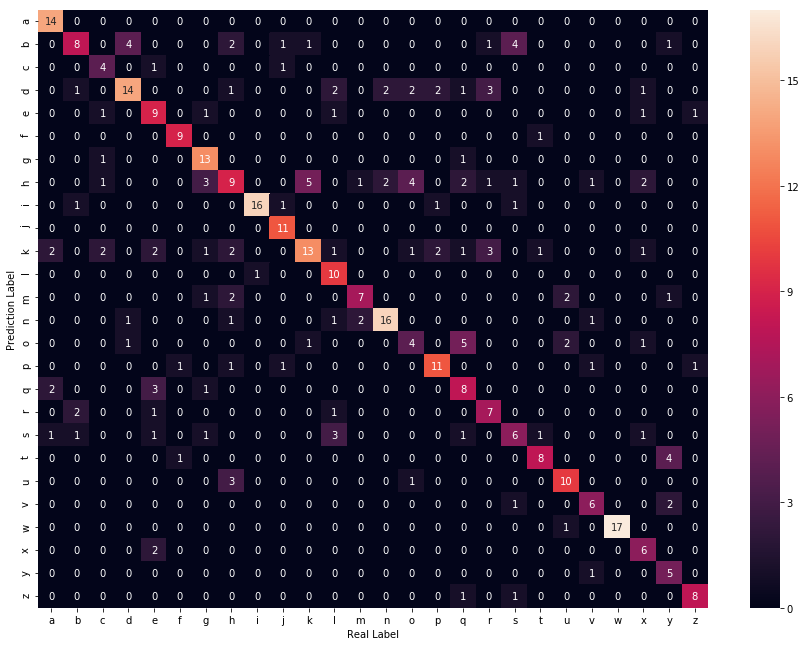

In [10]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "abcdefghijklmnopqrstuvwxyz"],
                  columns = [i for i in "abcdefghijklmnopqrstuvwxyz"])
plt.figure(figsize = (15,11))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [11]:
def get_pred_train(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = X[j]
    test_y = y[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(1600):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(325):
        pred_outputs = get_pred_train(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
train_acc = np.sum(list_P == y)/1600
print("Train Accuracy:{}".format(train_acc))

Train Accuracy:0.701875


In [13]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
avg_train_acc = np.mean(winner_fitness)
print("Avg Train Accuracy:{}".format(avg_train_acc))

Avg Train Accuracy:0.9329780343636228


In [14]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))

Total nodes:2475 Total connections::3141


In [15]:
with open("ovo2.txt","w") as f:
    for item in [avg_train_acc, train_acc, test_acc, total_nodes, total_connections]:
        f.write(str(item)+'\n')